To-do list:

- [X] Resolver preenchimento de NaN para features categóricas (TODOs no código) (Mari)
- [X] Resolver preenchimento de NaN para features numéricas (Piscinão)
- [] Ver jeitos de remover excesso de features (Mari)
    - [X] Verificar se tem features que são redundantes
    - [X] Simplificar categorias
    - [] Verificar se o Ordinal Encoding pode ser usado pra algumas features
- [X] Fazer gráficos para visualização melhor (Mari)


- [] Separar datasets (sem mexer, normalizado e não normalizado) (Piscinão)
- [] Testar modelos EM ARQUIVOS SEPARADOS (Piscinão & Caio) (TIRAR A COLUNA ID)
    - [] Random Forest -> dá pra ver features importantes depois do treino
    - [] XGBoost -> dá pra ver features importantes depois do treino
    - [] SVM
    - [] KNN
    - [] Regressão Laço -> tem normalização
    - [] Regressão Linear

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
# Coluna Id é análoga às linhas do DataFrame
df = pd.read_csv("./train.csv")

In [210]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Analisando Dados Nulos Categoricos

In [211]:
import missingno as msno

In [212]:
df_categorical = df.select_dtypes(include='object')
df_categorical = pd.concat([df['Id'], df_categorical], axis = 1)
df_categorical = pd.concat([df_categorical, df['SalePrice']], axis = 1)

In [213]:
df_categorical

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,1459,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [214]:
nan = df_categorical.isna().mean()*100
features = nan[nan > 0].index
nan[nan > 0].sort_index() # colunas com mais que 5% de dados nulos

# nesse dataset muitos dos nulos formam uma categoria e têm significado.
# podemos usar alguns daq, mas estão bem desbalanceados.

Alley           93.767123
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
BsmtQual         2.534247
Electrical       0.068493
Fence           80.753425
FireplaceQu     47.260274
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageType       5.547945
MasVnrType      59.726027
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

Algumas colunas estão diretamente relacionadas nos valores nulos (como as de garagem e basement), só há uma instância que apresenta incoerências em basement, a qual resolvi dropar. Electrical é a única que não tem nan como uma de umas categorias.

In [215]:
features = features.to_list()
features.remove('Electrical')

In [216]:
for feature in features:
  df_categorical.loc[df_categorical[feature].isna(), feature] = 'None'

Para a feature "Electrical":


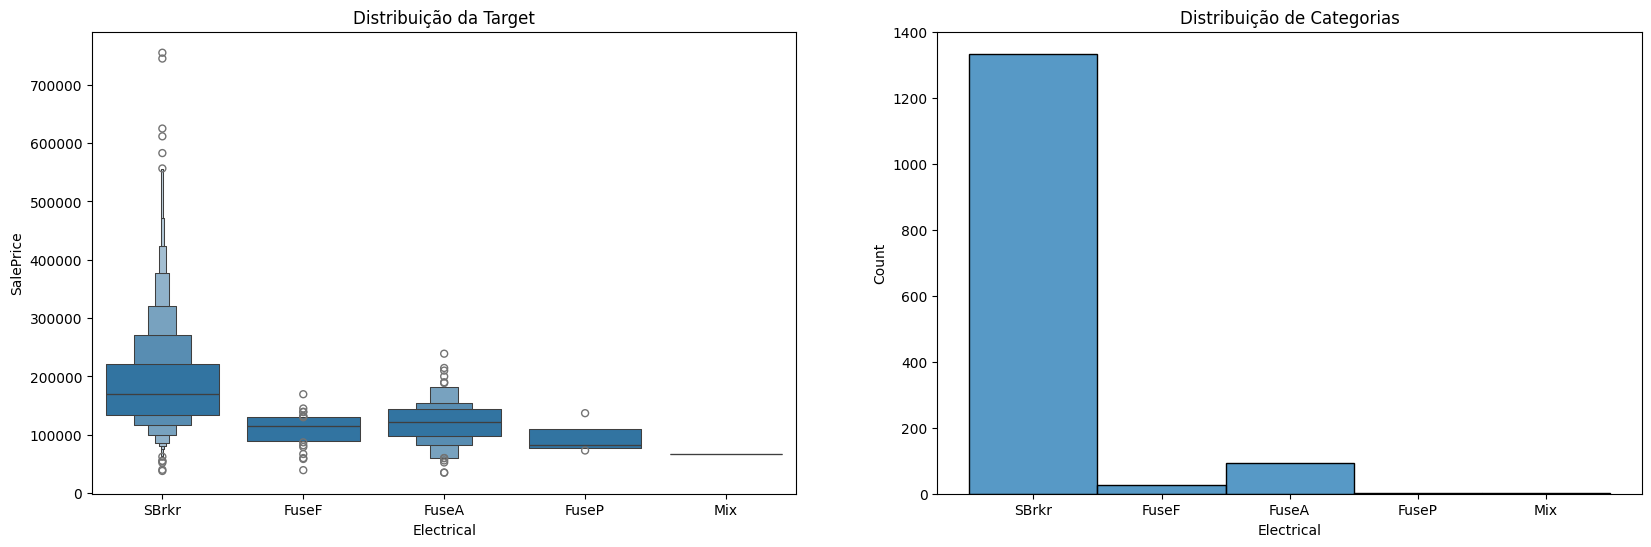

In [217]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.title('Distribuição da Target')
sns.boxenplot(data = df_categorical, x = 'Electrical', y = 'SalePrice')
plt.subplot(1, 2, 2)
plt.title('Distribuição de Categorias')
sns.histplot(data=df_categorical, x = 'Electrical')
plt.show() # substituir pela moda?

In [218]:
# inputando com a moda
FEATURE = 'Electrical'
df_categorical.loc[df_categorical[FEATURE].isna(), FEATURE] = df_categorical[FEATURE].mode()[0]

In [219]:
if df_categorical.isnull().values.any(): raise Exception("Ainda há features categóricas nulas!")

## Simplificação de Features Categóricas

Primeiro, é feita uma análise individual das features, buscando entender seu significado e relação com o target. baseado nisso e na participação das categorias, serão feitas algumas simplificações manualmente. 


Ainda não está acabada. Quem quiser pode dar uma analisada e adicionar mudanças nessa seção, sobretudo nas últimas features mostradas.

In [220]:
df_categorical.columns
# colunas a serem analisadas

Index(['Id', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [221]:
def plot_distribution(FEATURE):
  plt.figure(figsize = (10, 3))
  plt.subplot(1, 2, 1)
  plt.title('Distribuição da Target')
  sns.boxenplot(data = df_categorical, x = FEATURE, y = 'SalePrice')
  plt.subplot(1, 2, 2)
  plt.title('Distribuição de Categorias')

  sns.histplot(data=df_categorical, x = FEATURE)
  plt.show()

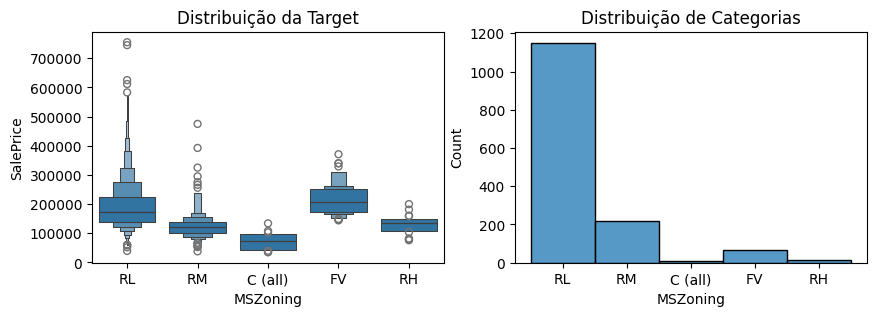

In [222]:
plot_distribution('MSZoning')

In [223]:
# RH - baixa qtde de dados e distribuição parecida com RM.

COLUMN = 'MSZoning'
df_categorical.loc[df_categorical[COLUMN].isin(['RH']), COLUMN] = 'RM'

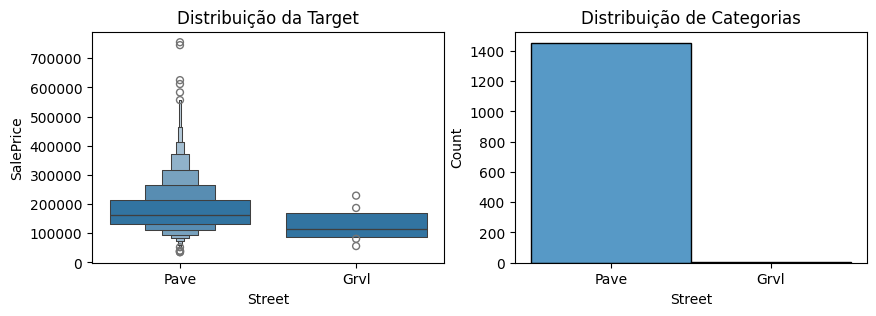

In [224]:
plot_distribution('Street')

In [225]:
COLUMN = 'Street'
df_categorical.loc[df_categorical[COLUMN].isin(['RH']), COLUMN] = 'RM'

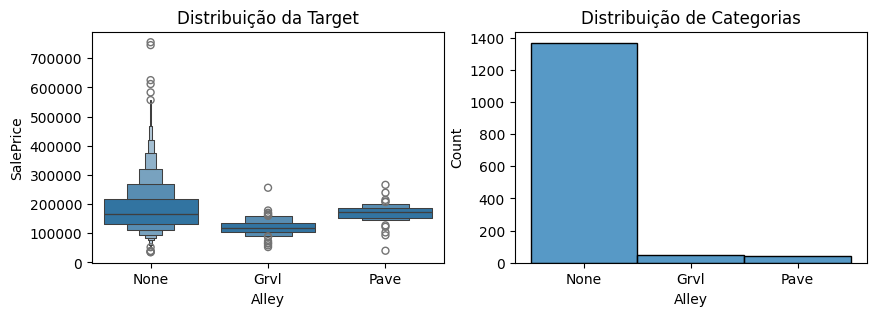

In [226]:
plot_distribution("Alley") 
# acho que Street já traz a informação entre pave/grvl
# e a maioria é none, ent dá pra dropar

In [227]:
df_categorical.drop("Alley", axis = 1, inplace = True)

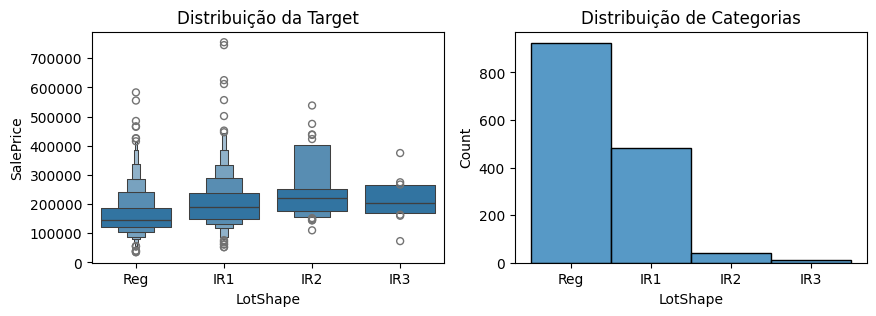

In [228]:
plot_distribution('LotShape')
# acho que dá pra juntar todos os irregulares em um só 
# regular -> 0
# irregular -> 1

In [229]:
COLUMN = 'LotShape'
df_categorical.loc[df_categorical[COLUMN].isin(['Reg']), COLUMN] = 0
df_categorical.loc[~df_categorical[COLUMN].isin(['Reg']), COLUMN] = 1
df_categorical[COLUMN] = pd.to_numeric(df_categorical[COLUMN])
df_categorical.rename(columns={COLUMN: 'Irregular'}, inplace=True)

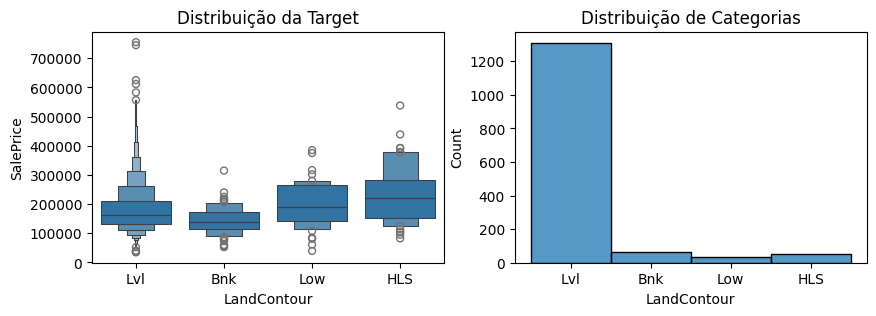

In [230]:
plot_distribution('LandContour')

In [231]:
# acho q tá mt desbalanceada pra usar, mas vamos ver se faz diferença nos modelos
# se formos usar, acho q vale juntar low com hls e bnk com lvl.

COLUMN = 'LandContour'
df_categorical.loc[~df_categorical[COLUMN].isin(['Lvl', 'Bnk']), COLUMN] = 0
df_categorical.loc[df_categorical[COLUMN].isin(['Lvl', 'Bnk']), COLUMN] = 1
df_categorical[COLUMN] = pd.to_numeric(df_categorical[COLUMN])
df_categorical.rename(columns={COLUMN: 'LowLandContour'}, inplace=True)

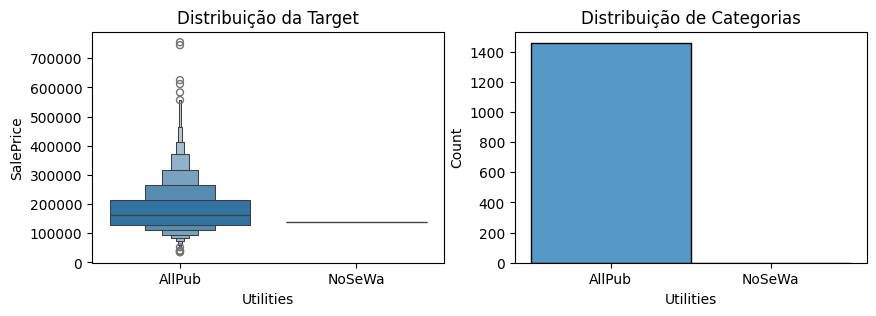

In [232]:
plot_distribution('Utilities') #dropa

In [233]:
df_categorical.drop('Utilities', axis = 1, inplace=True)

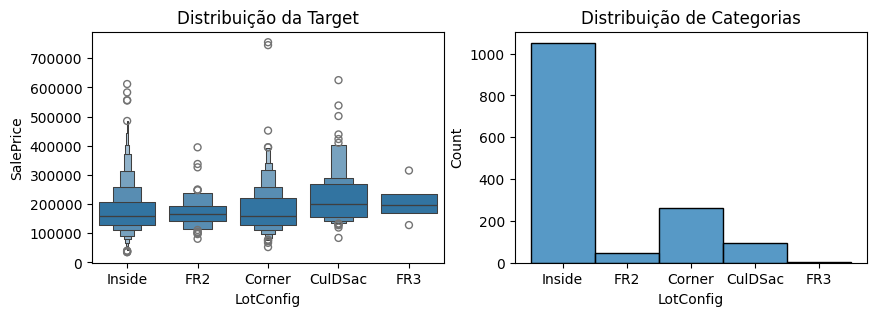

In [234]:
plot_distribution('LotConfig') 
# acho que não vai ser tao util e nao entendi bem as categorias
# deixa ai e testa com os modelos dps pra ver se jogamos fora ou nao

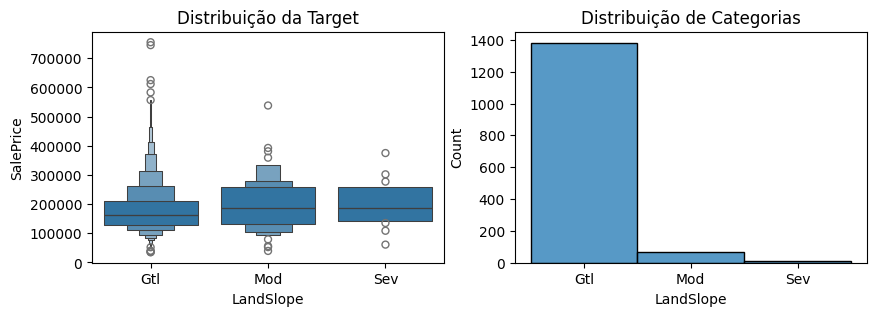

In [235]:
plot_distribution('LandSlope') 
# msm coisa, deixa aí mas vamos ver.  vou binarizar até la.


In [236]:
COLUMN = 'LandSlope'
df_categorical.loc[~df_categorical[COLUMN].isin(['Gtl']), COLUMN] = 0
df_categorical.loc[df_categorical[COLUMN].isin(['Gtl']), COLUMN] = 1
df_categorical[COLUMN] = pd.to_numeric(df_categorical[COLUMN])
df_categorical.rename(columns={COLUMN: 'HighLandSlope'}, inplace=True)

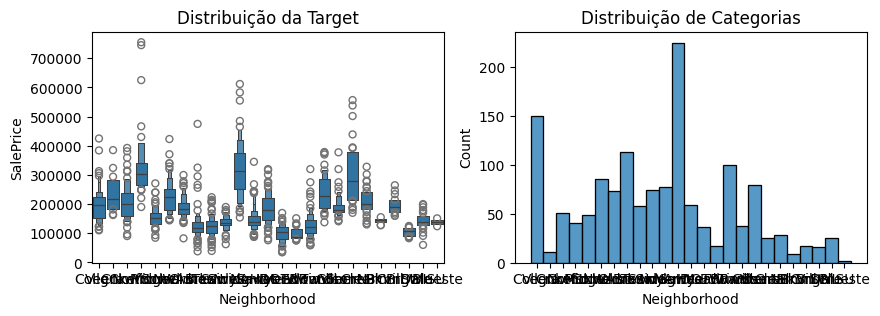

In [237]:
plot_distribution('Neighborhood') # TODO, pesquisar melhor


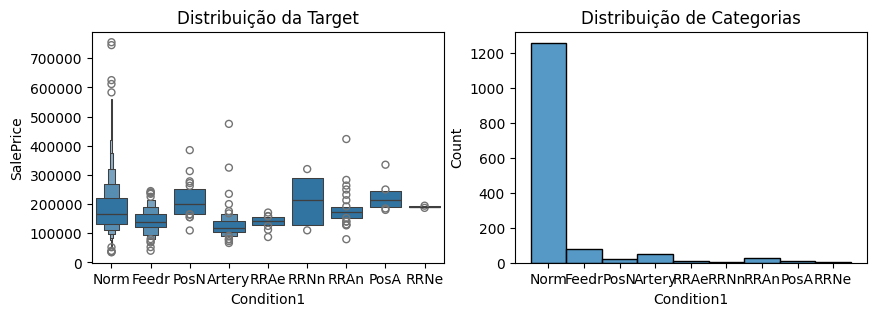

In [238]:
plot_distribution('Condition1') # TODO, pesquisar melhor

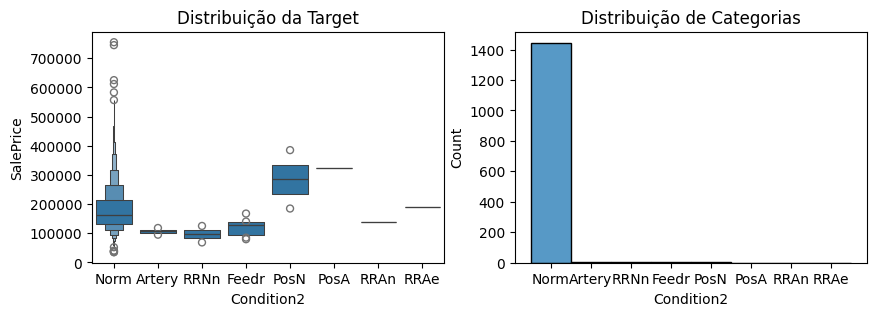

In [239]:
plot_distribution('Condition2') # TODO, pesquisar melhor

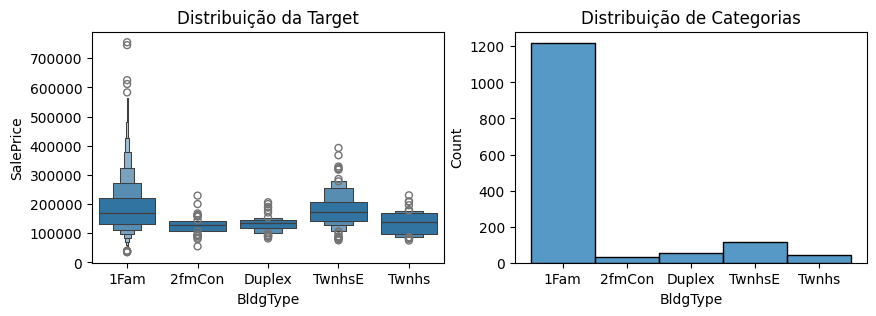

In [240]:
plot_distribution('BldgType') # deixa pra ver

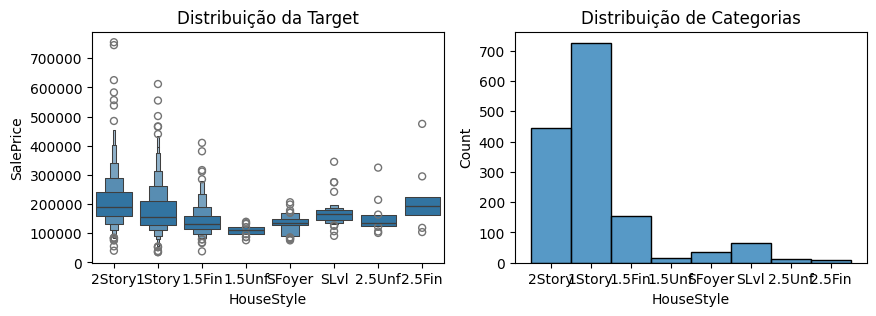

In [241]:
plot_distribution('HouseStyle') # TODO, pesquisar melhor

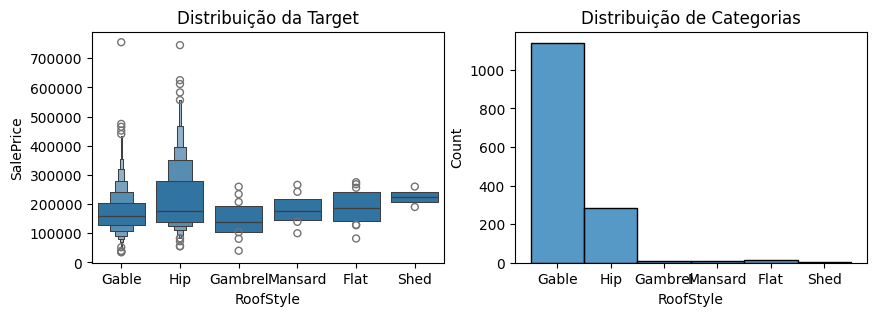

In [242]:
plot_distribution('RoofStyle') # acho q dá pra binarizar tb

In [243]:
COLUMN = 'RoofStyle'
df_categorical.loc[~df_categorical[COLUMN].isin(['Gable', 'Hip']), COLUMN] = 0
df_categorical.loc[df_categorical[COLUMN].isin(['Gable', 'Hip']), COLUMN] = 1
df_categorical[COLUMN] = pd.to_numeric(df_categorical[COLUMN])

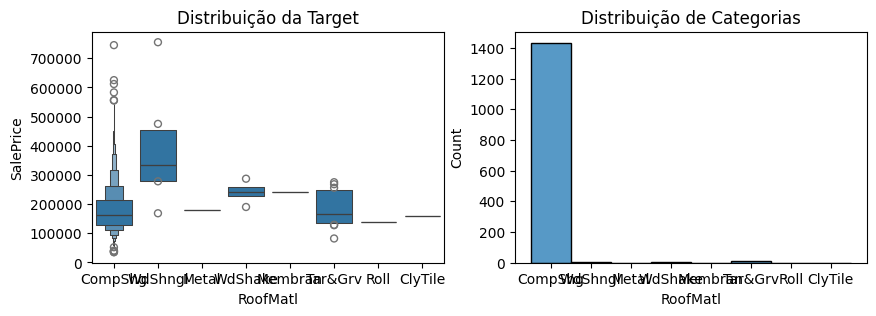

In [244]:
plot_distribution('RoofMatl') # TODO, pesquisar melhor

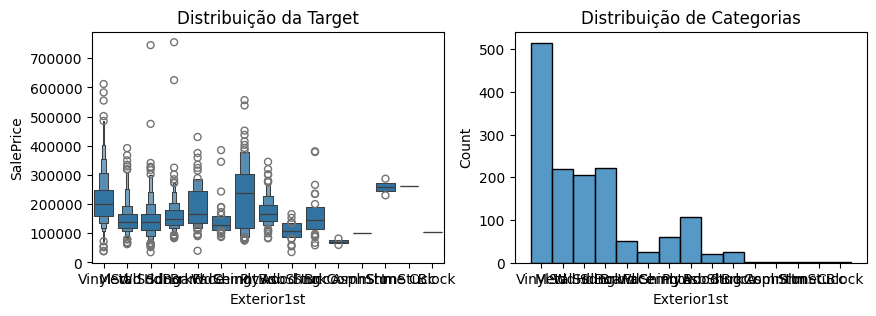

In [245]:
plot_distribution('Exterior1st') # TODO, pesquisar melhor

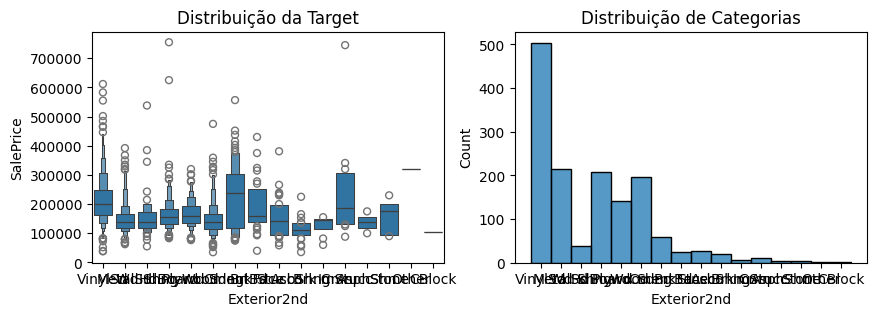

In [246]:
plot_distribution('Exterior2nd') # TODO, pesquisar melhor

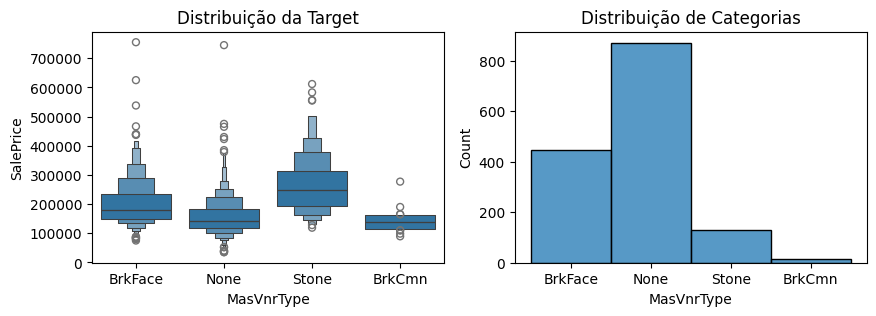

In [247]:
plot_distribution('MasVnrType') # juntar brick common e none?

In [248]:
COLUMN = 'MasVnrType'
df_categorical.loc[df_categorical[COLUMN].isin(['BrkCmn']), COLUMN] = 'None'

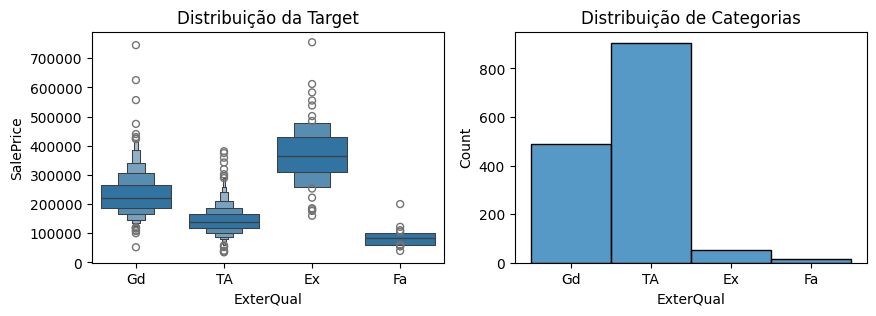

In [249]:
plot_distribution('ExterQual') 

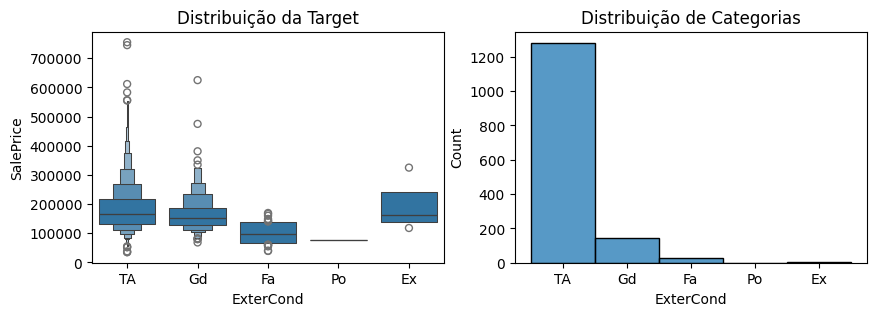

In [250]:
plot_distribution('ExterCond') 

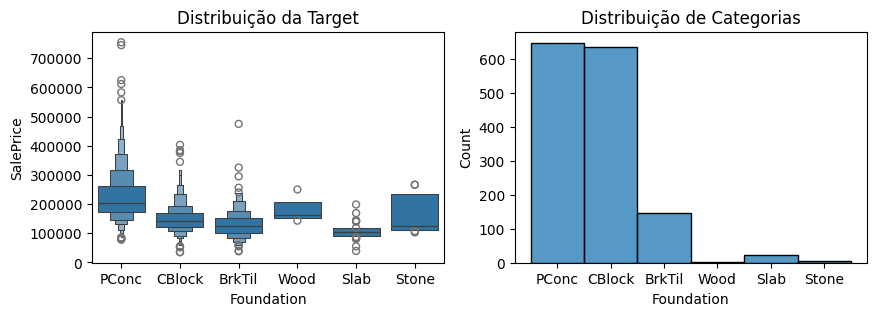

In [251]:
plot_distribution('Foundation') 

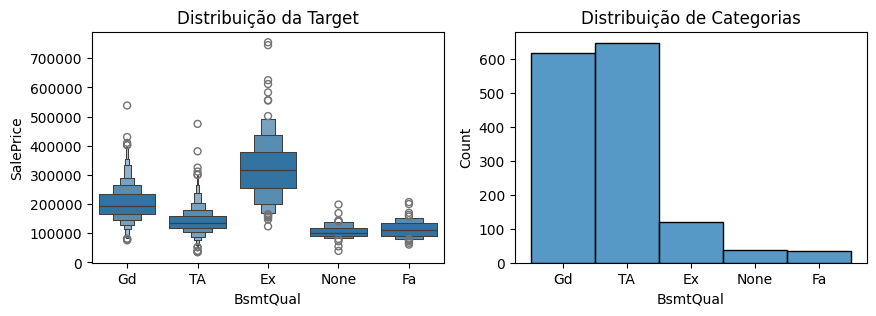

In [252]:
plot_distribution('BsmtQual') # juntar None e Fa

In [253]:
COLUMN = 'BsmtQual'
df_categorical.loc[df_categorical[COLUMN].isin(['Fair']), COLUMN] = 'None'

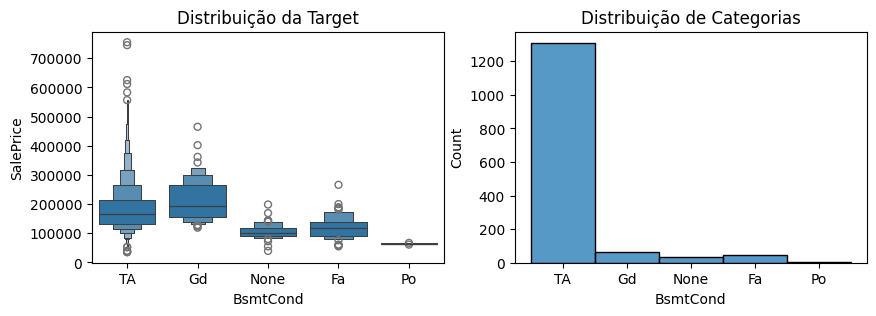

In [254]:
plot_distribution('BsmtCond') 

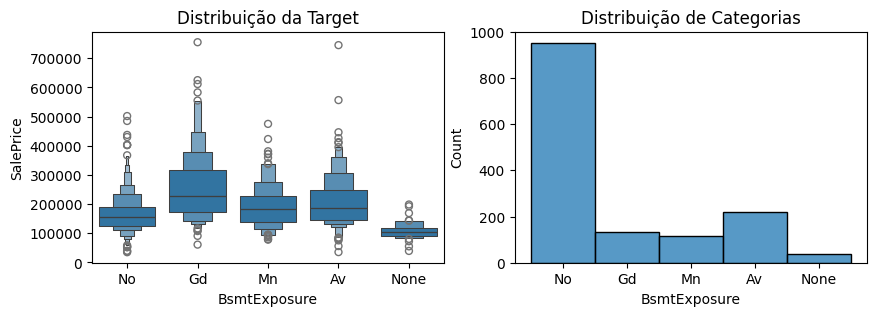

In [255]:
plot_distribution('BsmtExposure')  # Vamos deixar assim

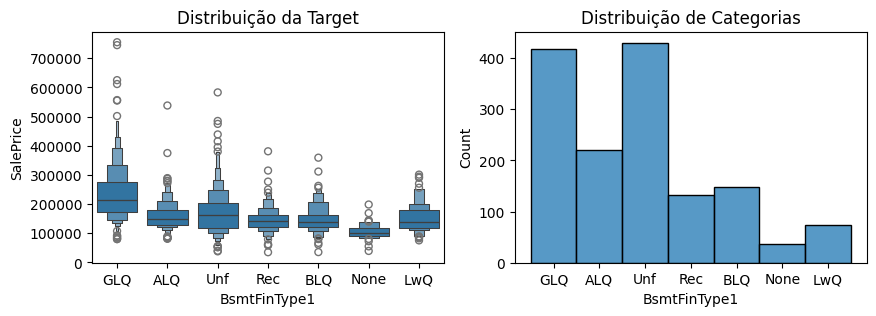

In [256]:
plot_distribution('BsmtFinType1') # deixa assim?

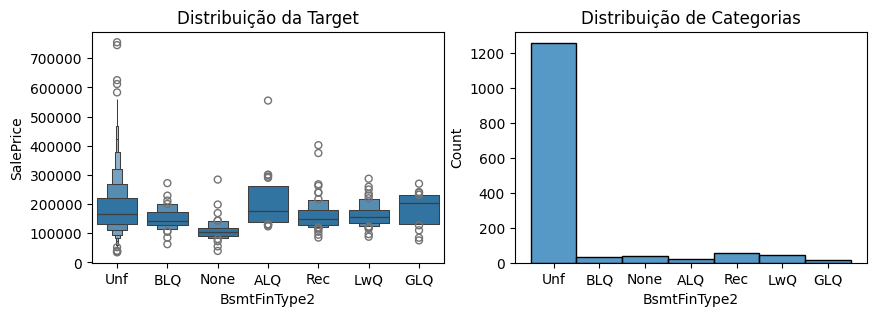

In [257]:
plot_distribution('BsmtFinType2') 

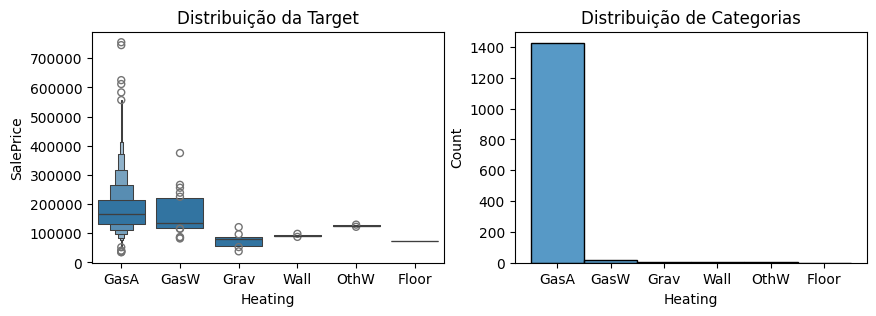

In [258]:
plot_distribution('Heating') 

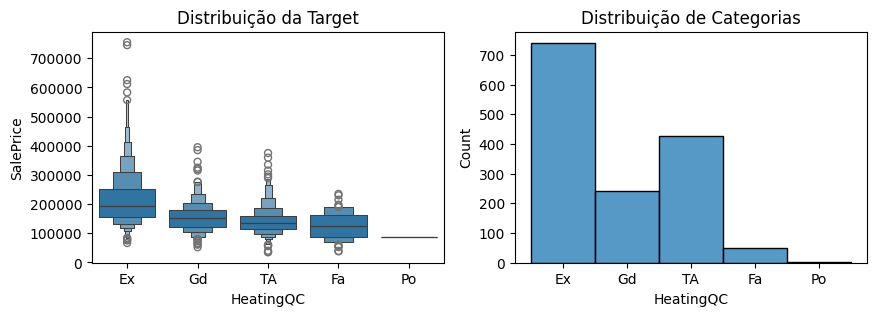

In [259]:
plot_distribution('HeatingQC') # junta fair e poor

In [260]:
COLUMN = 'HeatingQC'
df_categorical.loc[df_categorical[COLUMN].isin(['Po']), COLUMN] = 'Fa'

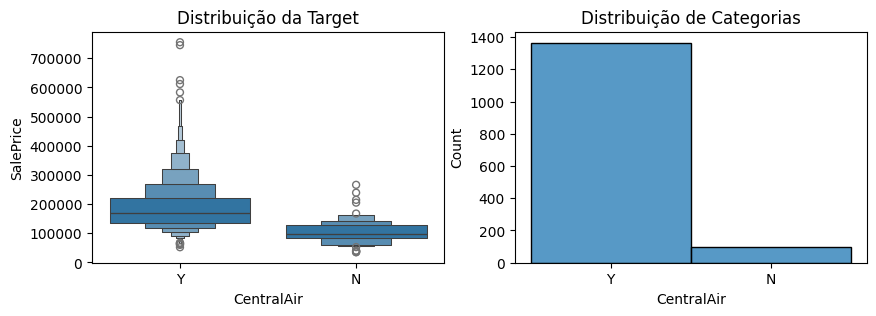

In [261]:
plot_distribution('CentralAir') # deixa assim

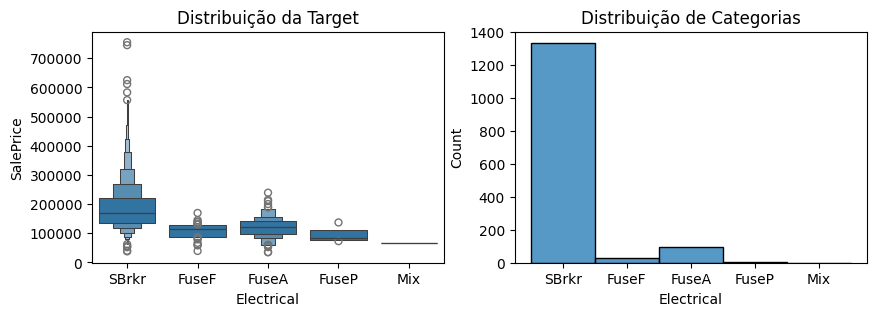

In [262]:
plot_distribution('Electrical') 

In [263]:
COLUMN = 'Electrical'
df_categorical.loc[~df_categorical[COLUMN].isin(['SBrkr']), COLUMN] = 'Fuse'

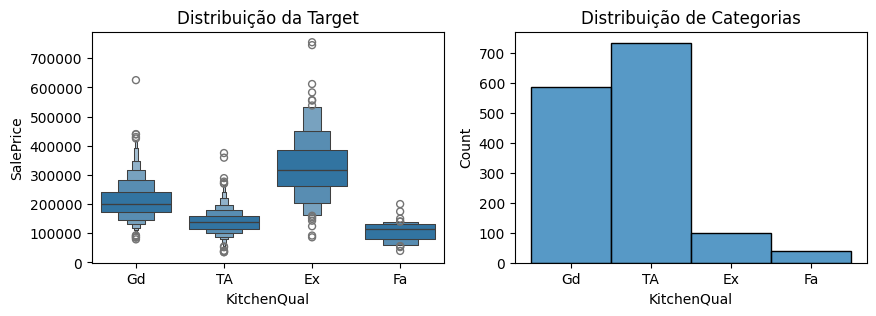

In [264]:
plot_distribution('KitchenQual') # deixa assim

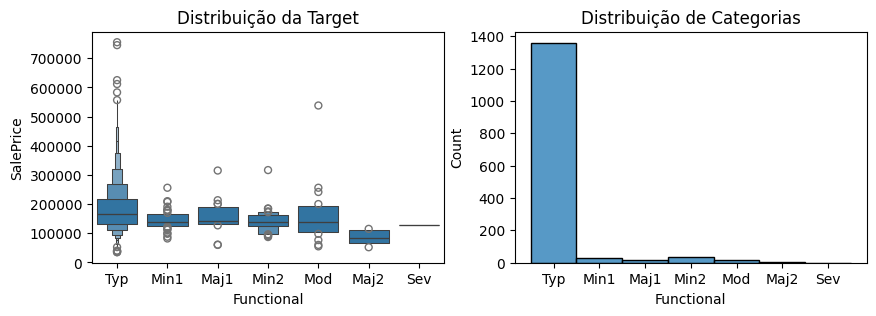

In [265]:
plot_distribution('Functional') 

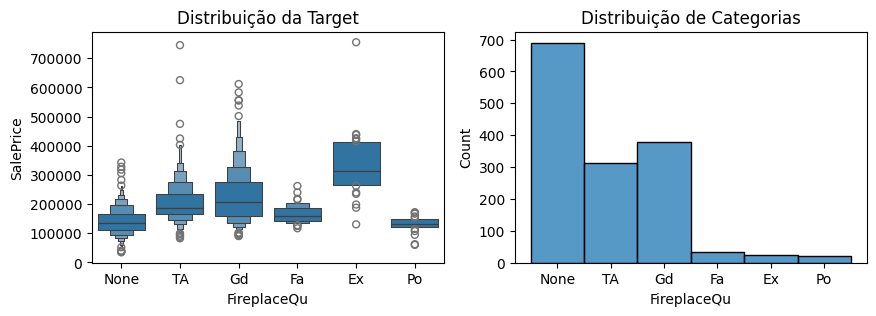

In [266]:
plot_distribution('FireplaceQu') 

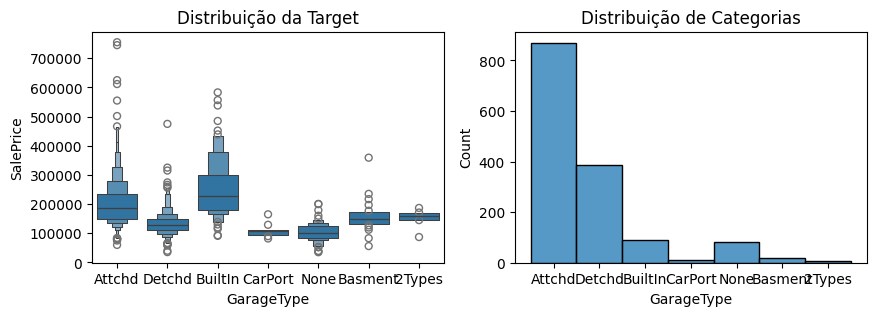

In [267]:
plot_distribution('GarageType') 

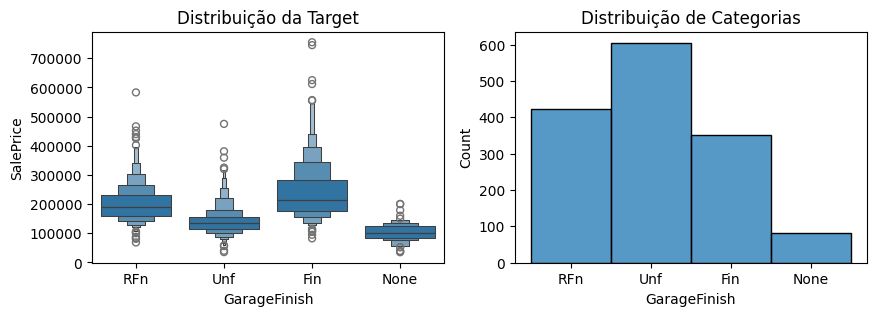

In [268]:
plot_distribution('GarageFinish') # deixa assim

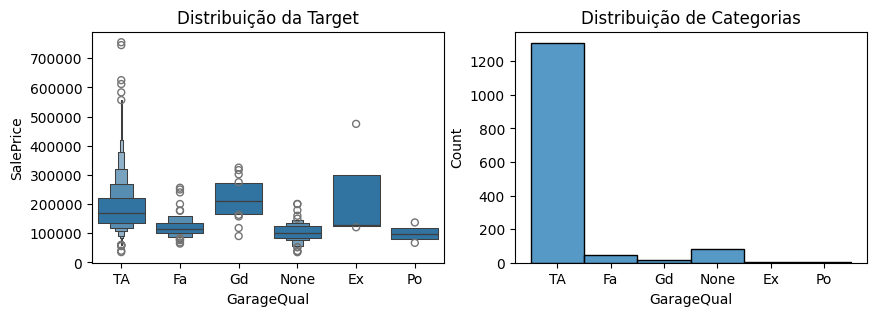

In [269]:
plot_distribution('GarageQual') 

In [270]:
COLUMN = 'GarageQual'
df_categorical.loc[df_categorical[COLUMN].isin(['Ex']), COLUMN] = 'Gd'
df_categorical.loc[df_categorical[COLUMN].isin(['Fa', 'None']), COLUMN] = 'Po'

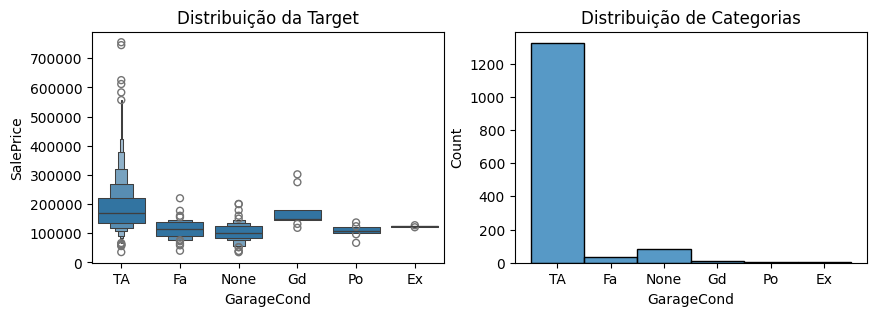

In [271]:
plot_distribution('GarageCond') 

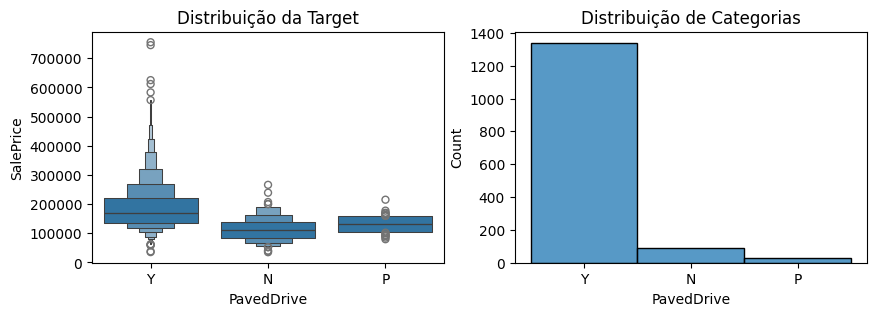

In [272]:
plot_distribution('PavedDrive') # juntar No e Partial

In [273]:
COLUMN = 'PavedDrive'
df_categorical.loc[~df_categorical[COLUMN].isin(['Y']), COLUMN] = 0
df_categorical.loc[df_categorical[COLUMN].isin(['Y']), COLUMN] = 1
df_categorical[COLUMN] = pd.to_numeric(df_categorical[COLUMN])

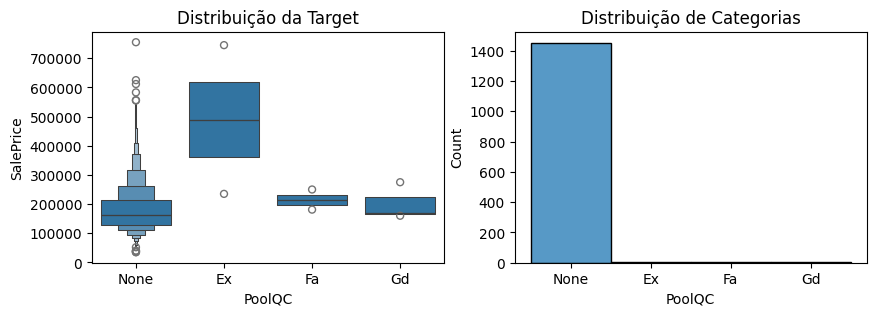

In [274]:
plot_distribution('PoolQC') 

In [275]:
COLUMN = 'PoolQC'
df_categorical.loc[~df_categorical[COLUMN].isin(['None']), COLUMN] = 1
df_categorical.loc[df_categorical[COLUMN].isin(['None']), COLUMN] = 0
df_categorical[COLUMN] = pd.to_numeric(df_categorical[COLUMN])
df_categorical.rename({COLUMN: 'Pool'}, axis = 1, inplace = True)

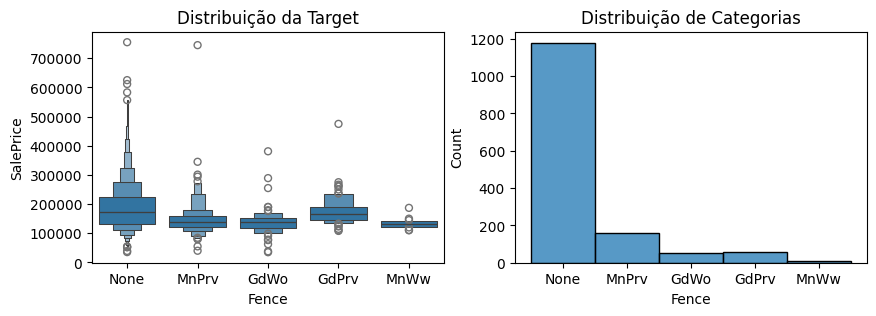

In [276]:
plot_distribution('Fence') 

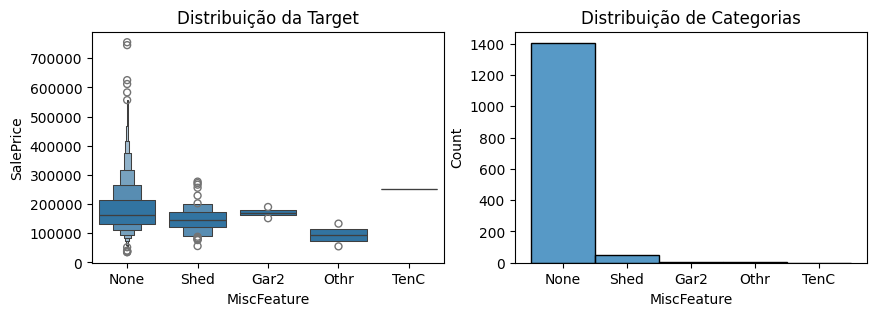

In [277]:
plot_distribution('MiscFeature') 

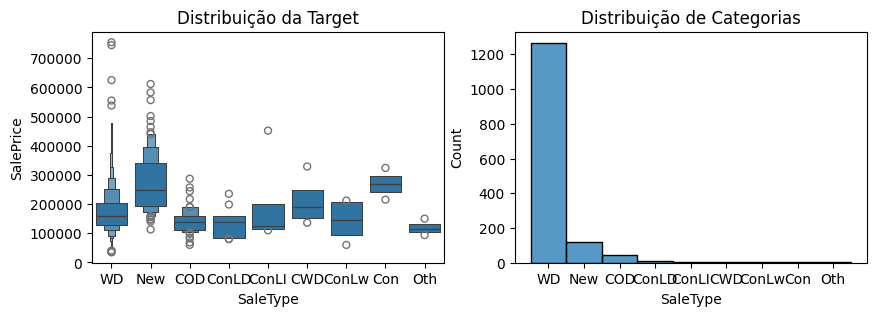

In [278]:
plot_distribution('SaleType') # verificar se juntar tudo no others é realmente a melhor opção

In [279]:
COLUMN = 'SaleType'
df_categorical.loc[df_categorical[COLUMN].isin(['ConLD', 'ConLD', 'CWD', 'ConLw', 'Con', 'Oth']), COLUMN] = 'Oth' 

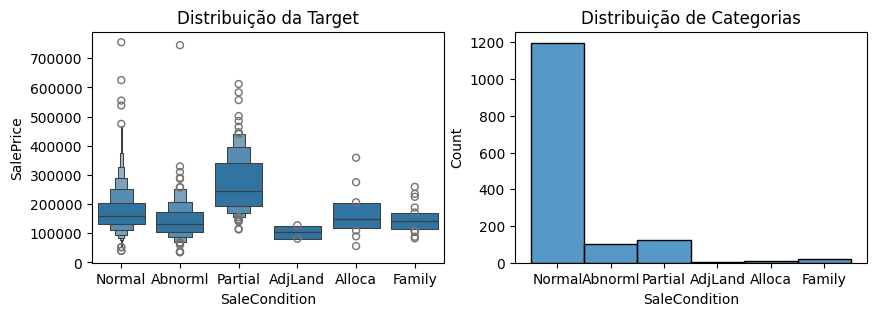

In [280]:
plot_distribution('SaleCondition') # agregar as últimas 3 em uma categoria "others" devido à baixa frequência

In [281]:
COLUMN = 'SaleCondition'
df_categorical.loc[df_categorical[COLUMN].isin(['AdjLand', 'Alloca', 'Family']), COLUMN] = 'Oth' 

## Analise Geral

In [282]:
# Temos mais colunas categóricas que numéricas, mas no geral equilibrado
df_numerical = df.select_dtypes(include=np.number)
n_numerical = len(df_numerical.columns) / len(df.columns)
n_categorical = len(df_categorical.columns) / len(df.columns)
print(f'Porcentagem de colunas categóricas: {n_categorical*100:.2f}%')
print(f'Porcentagem de colunas numéricas: {n_numerical*100:.2f}%')

Porcentagem de colunas categóricas: 53.09%
Porcentagem de colunas numéricas: 46.91%


Há dados duplicados no dataset?

In [283]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)
# Tudo nos conformes

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


#### Análise de Features Categóricas

In [284]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1460 non-null   int64 
 1   MSZoning        1460 non-null   object
 2   Street          1460 non-null   object
 3   Irregular       1460 non-null   int64 
 4   LowLandContour  1460 non-null   int64 
 5   LotConfig       1460 non-null   object
 6   HighLandSlope   1460 non-null   int64 
 7   Neighborhood    1460 non-null   object
 8   Condition1      1460 non-null   object
 9   Condition2      1460 non-null   object
 10  BldgType        1460 non-null   object
 11  HouseStyle      1460 non-null   object
 12  RoofStyle       1460 non-null   int64 
 13  RoofMatl        1460 non-null   object
 14  Exterior1st     1460 non-null   object
 15  Exterior2nd     1460 non-null   object
 16  MasVnrType      1460 non-null   object
 17  ExterQual       1460 non-null   object
 18  ExterCon

In [285]:
nan = df_categorical.isna().mean()*100
nan[nan > 5] # colunas categóricas com mais que 5% de dados nulo

Series([], dtype: float64)

Vamos ver o número de valores únicos em cada coluna categórica e a frequência de cada valor, para verificar se há outliers na nossa análise categórica.

In [286]:
max_unique = 0
col_max_unique = ""

for col in df_categorical.columns:
    if df_categorical[col].nunique() > max_unique:
        max_unique = df_categorical[col].nunique()
        col_max_unique = col

print(f'Coluna com mais valores únicos: {col_max_unique} com {max_unique} valores únicos')
# Tudo parece nos conformes segundo a descrição do dataset

Coluna com mais valores únicos: Id com 1460 valores únicos


In [287]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1460 non-null   int64 
 1   MSZoning        1460 non-null   object
 2   Street          1460 non-null   object
 3   Irregular       1460 non-null   int64 
 4   LowLandContour  1460 non-null   int64 
 5   LotConfig       1460 non-null   object
 6   HighLandSlope   1460 non-null   int64 
 7   Neighborhood    1460 non-null   object
 8   Condition1      1460 non-null   object
 9   Condition2      1460 non-null   object
 10  BldgType        1460 non-null   object
 11  HouseStyle      1460 non-null   object
 12  RoofStyle       1460 non-null   int64 
 13  RoofMatl        1460 non-null   object
 14  Exterior1st     1460 non-null   object
 15  Exterior2nd     1460 non-null   object
 16  MasVnrType      1460 non-null   object
 17  ExterQual       1460 non-null   object
 18  ExterCon

É importante fazermos o tratamento dos dados categóricos com `get_dummies` para que possamos usar modelos nos dados que serão convertidos usando one-hot encoding.

In [288]:
#df_categorical = pd.get_dummies(df_categorical)

In [289]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1460 non-null   int64 
 1   MSZoning        1460 non-null   object
 2   Street          1460 non-null   object
 3   Irregular       1460 non-null   int64 
 4   LowLandContour  1460 non-null   int64 
 5   LotConfig       1460 non-null   object
 6   HighLandSlope   1460 non-null   int64 
 7   Neighborhood    1460 non-null   object
 8   Condition1      1460 non-null   object
 9   Condition2      1460 non-null   object
 10  BldgType        1460 non-null   object
 11  HouseStyle      1460 non-null   object
 12  RoofStyle       1460 non-null   int64 
 13  RoofMatl        1460 non-null   object
 14  Exterior1st     1460 non-null   object
 15  Exterior2nd     1460 non-null   object
 16  MasVnrType      1460 non-null   object
 17  ExterQual       1460 non-null   object
 18  ExterCon

In [290]:
if df_categorical.isnull().values.any(): raise Exception("Ainda há features categóricas nulas!")

Temos muito mais features no nosso dataset para os valores únicos de cada valor categórico. Veremos depois se há correlação forte entre elas e `SalesPrice`.

#### Análise de Features Numéricas

In [291]:
def plot_numerical_distribution(FEATURE):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Distribuição da Target vs ' + FEATURE)
    sns.boxplot(data=df_numerical, x='SalePrice', y=FEATURE)

    plt.subplot(1, 2, 2)
    plt.title('Distribuição do ' + FEATURE)
    sns.histplot(data=df_numerical, x=FEATURE, bins=30, kde=True)

    plt.tight_layout()
    plt.show()

In [292]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [293]:
# TODO analisar as features com a função plot_numerical_distribution('FEATURE')

list(df_numerical)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Excluindo outliers

In [294]:
def exclui_outliers(DataFrame):
  for col_name in list(DataFrame):
    intervalo = 2.7*DataFrame[col_name].std()
    media = DataFrame[col_name].mean()
    DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
    DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

exclui_outliers(df_numerical)

In [295]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1420 non-null   float64
 2   LotFrontage    1185 non-null   float64
 3   LotArea        1445 non-null   float64
 4   OverallQual    1437 non-null   float64
 5   OverallCond    1432 non-null   float64
 6   YearBuilt      1451 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1411 non-null   float64
 9   BsmtFinSF1     1450 non-null   float64
 10  BsmtFinSF2     1403 non-null   float64
 11  BsmtUnfSF      1441 non-null   float64
 12  TotalBsmtSF    1449 non-null   float64
 13  1stFlrSF       1443 non-null   float64
 14  2ndFlrSF       1452 non-null   float64
 15  LowQualFinSF   1439 non-null   float64
 16  GrLivArea      1440 non-null   float64
 17  BsmtFullBath   1444 non-null   float64
 18  BsmtHalf

In [296]:
nan = df_numerical.isna().mean()*100
nan[nan > 5] # colunas com mais que 5% de dados nulos

LotFrontage     18.835616
BsmtHalfBath     5.616438
GarageYrBlt      5.958904
dtype: float64

Não há preocupante quantidade de dados nulos, mas não podem ser ignorados. Vamos analisar individualmente cada feature para decidir o que fazer com os nulos.

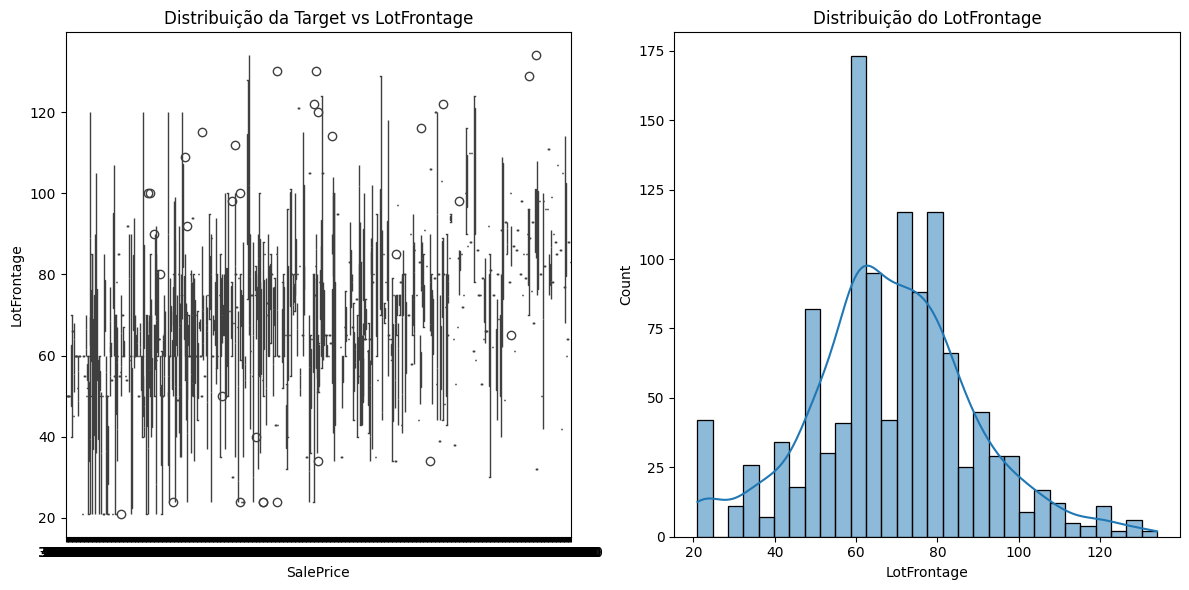

In [297]:
plot_numerical_distribution('LotFrontage')

Como visto acima, essa feature tem os dados relativamente equilibrados, vamos fazer random sampling para preencher os valores nulos.

In [298]:
random_sample_df = df_numerical['LotFrontage'].dropna().sample(df_numerical['LotFrontage'].isnull().sum(),
                                                random_state=0)
random_sample_df.index = df_numerical[
        df_numerical['LotFrontage'].isnull()].index

df_numerical.loc[df_numerical['LotFrontage'].isnull(), 'LotFrontage'] = random_sample_df

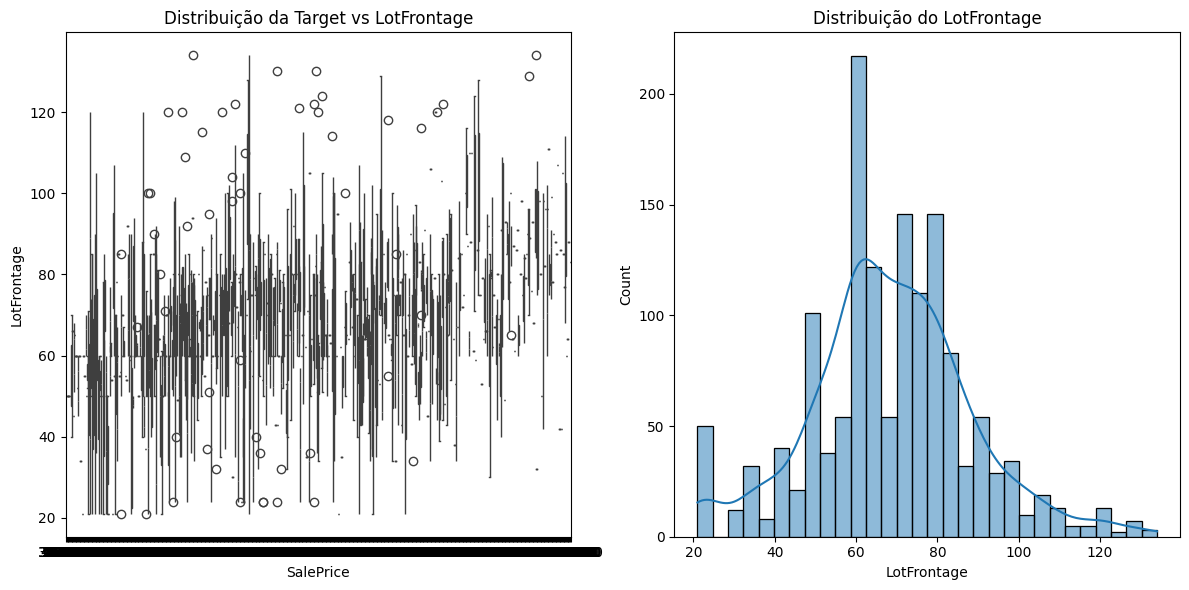

In [299]:
plot_numerical_distribution('LotFrontage')

Agora com `BsmtHalfBath`, coluna essa que parece conter apenas zeros. Nesse caso, podemos apenas dropar a coluna:

In [300]:
df_numerical['BsmtHalfBath'].describe()

count    1378.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: BsmtHalfBath, dtype: float64

In [301]:
df_numerical = df_numerical.drop('BsmtHalfBath', axis=1)

Já com `GarageYrBlt`, vamos inserir a mediana por conta da presença de alguns outliers e por conta da distribuição desbalanceada:

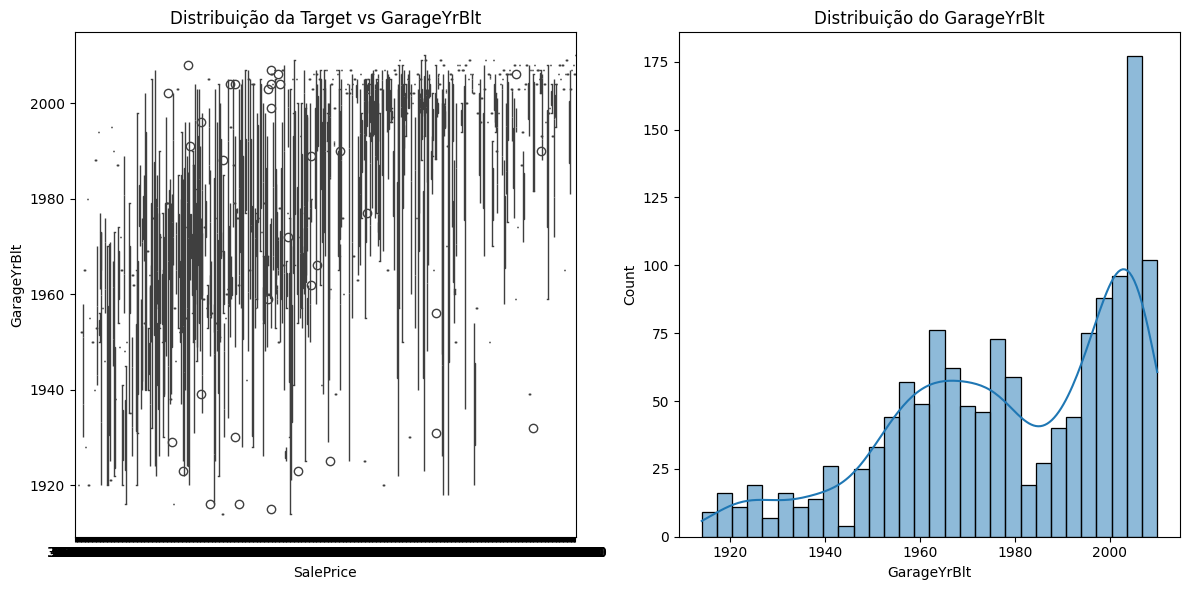

In [302]:
plot_numerical_distribution('GarageYrBlt')

In [303]:
df_numerical['GarageYrBlt'] = df_numerical['GarageYrBlt'].fillna(df_numerical['GarageYrBlt'].median())

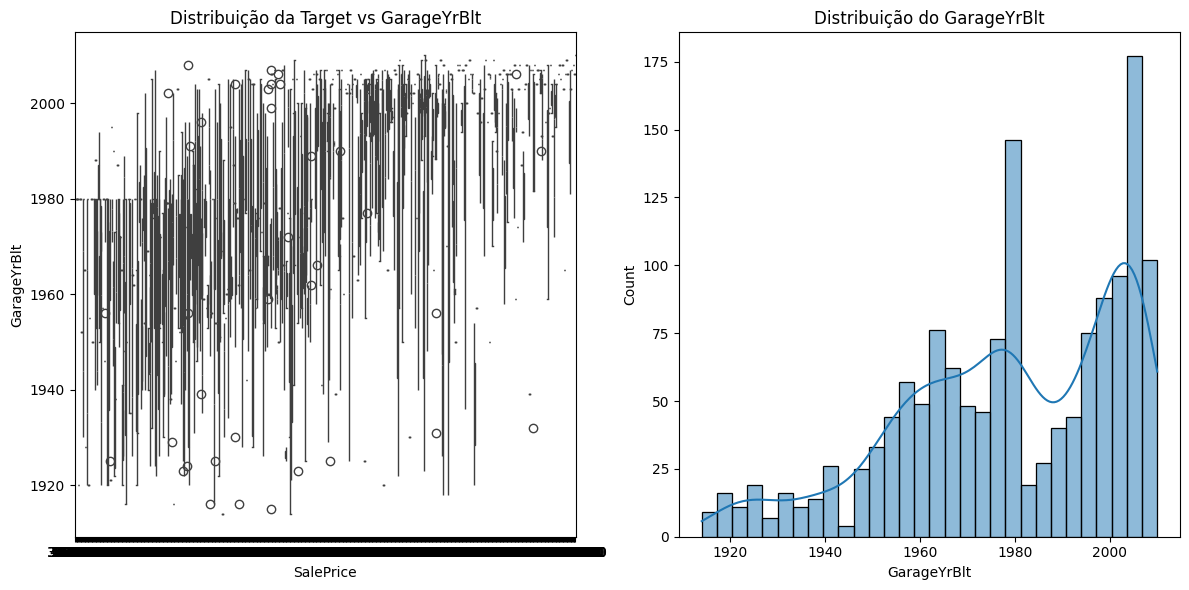

In [304]:
plot_numerical_distribution('GarageYrBlt')

Para o resto dos valores numéricos, vamos inserir a média:

In [305]:
for col in df_numerical.columns:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].mean())

In [306]:
if df_numerical.isnull().values.any(): raise Exception("Ainda há features numéricas nulas!")

## Pré-Processamento Final das Categóricas

In [307]:
pd.get_dummies(df_categorical)

,Id,Irregular,LowLandContour,HighLandSlope,RoofStyle,PavedDrive,Pool,SalePrice,MSZoning_C (all),MSZoning_FV,...,MiscFeature_TenC,SaleType_COD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Oth,SaleCondition_Partial
0,1,1,1,1,1,1,0,208500,False,False,...,False,False,False,False,False,True,False,True,False,False
1,2,1,1,1,1,1,0,181500,False,False,...,False,False,False,False,False,True,False,True,False,False
2,3,1,1,1,1,1,0,223500,False,False,...,False,False,False,False,False,True,False,True,False,False
3,4,1,1,1,1,1,0,140000,False,False,...,False,False,False,False,False,True,True,False,False,False
4,5,1,1,1,1,1,0,250000,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1,1,1,1,1,0,175000,False,False,...,False,False,False,False,False,True,False,True,False,False
1456,1457,1,1,1,1,1,0,210000,False,False,...,False,False,False,False,False,True,False,True,False,False
1457,1458,1,1,1,1,1,0,266500,False,False,...,False,False,False,False,False,True,False,True,False,False
1458,1459,1,1,1,1,1,0,142125,False,False,...,False,False,False,False,False,True,False,True,False,False


In [308]:
from sklearn.preprocessing import OneHotEncoder

In [309]:
ohe = OneHotEncoder(drop = 'if_binary', sparse_output=False)
data = ohe.fit_transform(df_categorical.select_dtypes(include='object'))
features = ohe.get_feature_names_out()
data = pd.DataFrame(data, columns = features)
df_categorical = pd.concat(df_categorical['Id'], data)

Preferi usar o OneHotEncoder da sklearn ao get_dummmies do pandas.

#### Análise de Features Numéricas

In [310]:
df_numerical = df.select_dtypes(exclude='object')

In [311]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Excluindo outliers

In [312]:
def exclui_outliers(DataFrame):
  for col_name in list(DataFrame):
    intervalo = 2.7*DataFrame[col_name].std()
    media = DataFrame[col_name].mean()
    DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
    DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

exclui_outliers(df_numerical)

In [313]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1420 non-null   float64
 2   LotFrontage    1185 non-null   float64
 3   LotArea        1445 non-null   float64
 4   OverallQual    1437 non-null   float64
 5   OverallCond    1432 non-null   float64
 6   YearBuilt      1451 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1411 non-null   float64
 9   BsmtFinSF1     1450 non-null   float64
 10  BsmtFinSF2     1403 non-null   float64
 11  BsmtUnfSF      1441 non-null   float64
 12  TotalBsmtSF    1449 non-null   float64
 13  1stFlrSF       1443 non-null   float64
 14  2ndFlrSF       1452 non-null   float64
 15  LowQualFinSF   1439 non-null   float64
 16  GrLivArea      1440 non-null   float64
 17  BsmtFullBath   1444 non-null   float64
 18  BsmtHalf

In [314]:
nan = df_numerical.isna().mean()*100
nan[nan > 5] # colunas com mais que 5% de dados nulos

LotFrontage     18.835616
BsmtHalfBath     5.616438
GarageYrBlt      5.958904
dtype: float64

Não há preocupante quantidade de dados nulos, mas não podem ser ignorados. Vamos trocar os valores pela média de cada coluna

In [315]:
# Preencher nan com a média
for col in df_numerical.columns:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].mean())

In [316]:
if df_numerical.isnull().values.any(): raise Exception("Ainda há features numéricas nulas!")

### Gráficos e correlações

<Axes: >

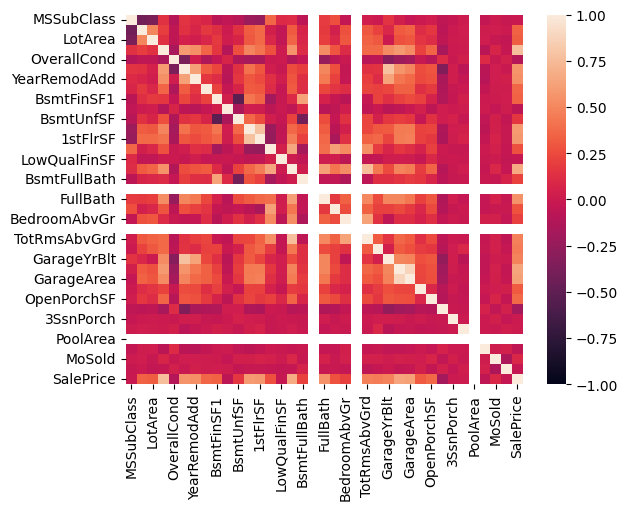

In [317]:
sns.heatmap(df_numerical.drop('Id', axis=1).corr(), annot=False, vmin=-1, vmax=1, fmt=".2f")

- dropar YrSold e MoSold tlvz
- fazer alguma transformação c/ features muito desbalanceadas

#### Análise de Features do tipo Object

#### Unindo valores numéricos e categóricos

In [318]:
df = pd.merge(df_numerical, df_categorical, on="Id")

KeyError: 'Id'

In [ ]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,Pool,Fence,MiscFeature,SaleType,SaleCondition,SalePrice_y
0,1.0,60.0,65.0,8450.0,7.0,5.000000,2003.0,2003.0,196.0,706.0,...,RFn,TA,TA,1,0,None,None,WD,Normal,208500
1,2.0,20.0,80.0,9600.0,6.0,8.000000,1976.0,1976.0,0.0,978.0,...,RFn,TA,TA,1,0,None,None,WD,Normal,181500
2,3.0,60.0,68.0,11250.0,7.0,5.000000,2001.0,2002.0,162.0,486.0,...,RFn,TA,TA,1,0,None,None,WD,Normal,223500
3,4.0,70.0,60.0,9550.0,7.0,5.000000,1915.0,1970.0,0.0,216.0,...,Unf,TA,TA,1,0,None,None,WD,Abnorml,140000
4,5.0,60.0,84.0,14260.0,8.0,5.000000,2000.0,2000.0,350.0,655.0,...,RFn,TA,TA,1,0,None,None,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.000000,1999.0,2000.0,0.0,0.0,...,RFn,TA,TA,1,0,None,None,WD,Normal,175000
1456,1457.0,20.0,85.0,13175.0,6.0,6.000000,1978.0,1988.0,119.0,790.0,...,Unf,TA,TA,1,0,MnPrv,None,WD,Normal,210000
1457,1458.0,70.0,66.0,9042.0,7.0,5.538408,1941.0,2006.0,0.0,275.0,...,RFn,TA,TA,1,0,GdPrv,Shed,WD,Normal,266500
1458,1459.0,20.0,68.0,9717.0,5.0,6.000000,1950.0,1996.0,0.0,49.0,...,Unf,TA,TA,1,0,None,None,WD,Normal,142125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   float64
 1   MSSubClass      1460 non-null   float64
 2   LotFrontage     1460 non-null   float64
 3   LotArea         1460 non-null   float64
 4   OverallQual     1460 non-null   float64
 5   OverallCond     1460 non-null   float64
 6   YearBuilt       1460 non-null   float64
 7   YearRemodAdd    1460 non-null   float64
 8   MasVnrArea      1460 non-null   float64
 9   BsmtFinSF1      1460 non-null   float64
 10  BsmtFinSF2      1460 non-null   float64
 11  BsmtUnfSF       1460 non-null   float64
 12  TotalBsmtSF     1460 non-null   float64
 13  1stFlrSF        1460 non-null   float64
 14  2ndFlrSF        1460 non-null   float64
 15  LowQualFinSF    1460 non-null   float64
 16  GrLivArea       1460 non-null   float64
 17  BsmtFullBath    1460 non-null   f